### K-NN 알고리즘

In [22]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [9]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


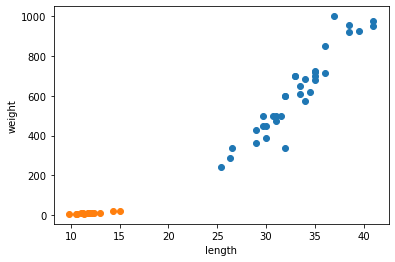

In [10]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [17]:
# zip 함수는 나열된 리스트 각각에서 원소를 하나씩 꺼내 반환
fish_data = [[l, w] for l, w in zip(length, weight)]

In [20]:
# 정답 데이터 도미 = 1, 빙어 = 0
fish_target = [1] * 35 + [0] * 14

In [24]:
# 해당 클래스의 객체 생성
kn = KNeighborsClassifier()

In [26]:
# socre 함수는 0 ~ 1 사이의 값을 반환하며 1 = 모든데이터 정답, 0.5 = 절반의 데이터 정답
kn.fit(fish_data, fish_target)
print(kn.score(fish_data, fish_target))

1.0


In [28]:
# 어떤 데이터를 넣어도 도미로 예측하기 때문에 35/48 = 0.7142.... 라는 결과가 나옴
kn = KNeighborsClassifier(n_neighbors=49)
kn.fit(fish_data, fish_target)
print(kn.score(fish_data, fish_target))

0.7142857142857143


### K-NN 알고리즘 실습 (훈련 셋과 데이터 셋 분리)

In [29]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [33]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [78]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

print(kn.predict(test_input))
print(test_target)

1.0
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [79]:
print(kn.predict([[25.0, 150.0]])) #도미의 샘플이지만 빙어로 예측

[0]


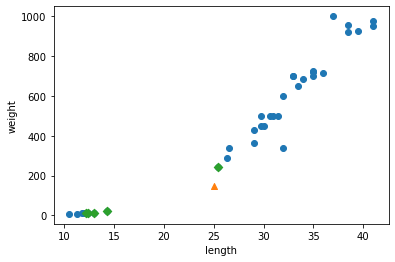

In [82]:
# k 근처 값이 1개 제외 나머지 4개가 빙어라서 빙어로 예측
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [83]:
# 거리 출력
print(distances) # 92... = 도미, 130... = 빙어
# 거리가 이상한 이유는 x축의 범위는 좁고 y축의 범위는 넓기 때문

[[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]


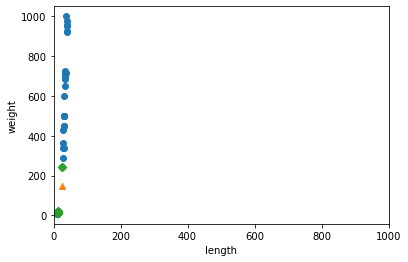

In [85]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000)) # x축 범위 조절
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 
- 실제로 x는 거리에 영향을 거의 미치지 않는다
- 두 특성의 값의 범위 매우 다른 경우를 두 특성의 스케일(scale)이 다르다고 말한다

##### K-NN과 같이 거리 기반 알고리즘을 사용할 땐 기준이 다르면 알고리즘이 올바르게 예측 할 수 없다. 따라서 일정한 기준으로 맞추는 작업을 데이터 전처리(Data Preprocessing)라고 한다

- 최소-최대 정규화(min-max normalization)
- z-score 표준화(z-score standardization)

### 1. 최소-최대 정규화
변수 X의 범위를 0%에서 100%까지로 나타내는 방식

$$X_{new} = \frac{X - min(X)}{max(x)-min(X)}$$

### 2. z-score 표준화
변수 X의 범위를 평균으로부터 몇 표준편차만큼 떨어져 있는지를 관점으로 변수를 확대/축소 시키는 방식

- 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 낸 것
- 표준편차 : 분산의 제곱근

$$X_{new} = \frac{X - mean(X)}{StdDev(X)}$$

- 두 방식중 z-점수 표준화를 많이 사용
- 최소-최대 정규화는 테스트 셋의 최소/최대가 범위를 벗어나는 경우가 생길 수 있기 대문

In [87]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)

train_scaled = (train_input - mean) / std

[ 28.29428571 483.35714286] [  9.54606704 323.47456715]


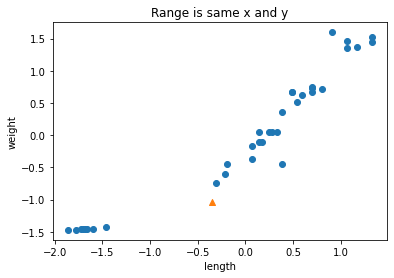

In [92]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.title('Range is same x and y')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [89]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)
print(kn.predict([new]))

[1]


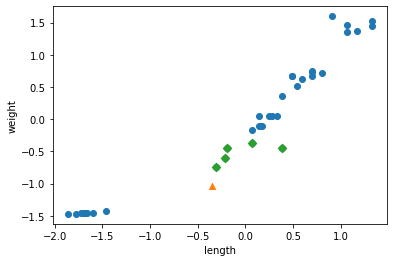

In [102]:
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()